In [11]:
# this is a sentimental analysis program


In [36]:
# import the liberaries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
# Twitter API Credentials
consumerKey = "cWOa6BzsWy52sjStVkZn8PfQO"
consumerSecret ="ctZxVd5FCbM5DzYjDXXgZisAOIwdDRaSe94ME29G7KrSGzUcJX"
accessToken ="1181092836894076928-CBIF230NS5EEBKBkxptsilbi6J5e3F"
accessTokenSecret="FovUjYTjOwL0NzF2ROW7p1QXPJBSWOHG4ckEk1xbabZ6J"

In [38]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [39]:
# extract 150 tweets from the twitter user
posts = api.user_timeline(screen_name ="BillGates", count = 150, lang = "en" , tweet_mode="extended")

# print the last 5 tweets from the account
print ("show the recent 5 tweets:\n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i = i+1

show the recent 5 tweets:

1)Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-deserved honor. https://t.co/44jYPCZCbt

2)Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. https://t.co/9N0hL2xvTQ

3)Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author @ElizKolbert. https://t.co/ugS31mpJin

4)This new quiz from @Gapminder is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: https://t.co/Qo0oaxv1tb

5)Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social med

In [40]:
# create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])

# show the first 5 rows of data
df.head()

,Tweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...
1,Here are five books that I’d recommend as we w...
2,Are we actually making progress on climate cha...
3,This new quiz from @Gapminder is a clever way ...
4,Rashida Jones and I talked to Yuval Noah Harar...


In [41]:
# clean the text 

# create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # remove '@'mentions
    text = re.sub(r'#', '' , text) # removing the '#' symbol
    text = re.sub(r' RT[\s]+' , '' ,text)# removing RT
    text = re.sub(r'https?:\/\/\S+' , '',text)# remove the hyper link
    
    return text

# cleaning the text
df['Tweets']= df['Tweets'].apply(cleanTxt)

# show the cleaned text
df

,Tweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...
1,Here are five books that I’d recommend as we w...
2,Are we actually making progress on climate cha...
3,This new quiz from is a clever way to fight m...
4,Rashida Jones and I talked to Yuval Noah Harar...
5,I believe we can avoid a climate disaster—if w...
6,"To reduce duplication, focus the government’s ..."
7,We need to revolutionize the world’s physical ...
8,This the most important thing the U.S. can do ...
9,I’m inspired by Quarraisha Abdool Karim and . ...


In [42]:
# create a function to get the subjectivity 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
df

,Tweets,subjectivity,Polarity
0,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000
1,Here are five books that I’d recommend as we w...,0.600000,0.700000
2,Are we actually making progress on climate cha...,0.150000,0.100000
3,This new quiz from is a clever way to fight m...,0.729293,0.401010
4,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667
5,I believe we can avoid a climate disaster—if w...,0.419643,0.246429
6,"To reduce duplication, focus the government’s ...",0.477273,0.318182
7,We need to revolutionize the world’s physical ...,0.372619,-0.186111
8,This the most important thing the U.S. can do ...,0.750000,0.450000
9,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000


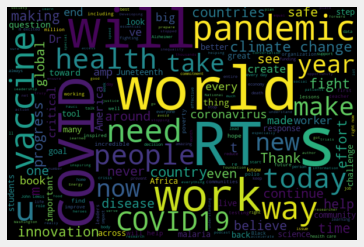

In [27]:
# Plot the word cloud
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600 , height = 400, random_state = 21 , max_font_size = 119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
# create a function to compute the negative , neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else :
        return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

# show the dataframe
df

,Tweets,subjectivity,Polarity,Analysis
0,Here are five books that I’d recommend as we w...,0.600000,0.700000,Positive
1,Are we actually making progress on climate cha...,0.150000,0.100000,Positive
2,This new quiz from is a clever way to fight m...,0.729293,0.401010,Positive
3,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667,Positive
4,I believe we can avoid a climate disaster—if w...,0.419643,0.246429,Positive
5,"To reduce duplication, focus the government’s ...",0.477273,0.318182,Positive
6,We need to revolutionize the world’s physical ...,0.372619,-0.186111,Negative
7,This the most important thing the U.S. can do ...,0.750000,0.450000,Positive
8,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000,Positive
9,RT : My parents taught me to leave the world b...,0.500000,0.500000,Positive


In [29]:
# Print all the positives tweets
a=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0 , sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(a) + ')' +sortedDF['Tweets'][i])
        print()
        a=a+1

1)Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. 

2)Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author . 

3)This new quiz from  is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: 

4)Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spreading misinformation, and the one lie I choose to believe even though I know it’s not always true:  

5)I believe we can avoid a climate disaster—if we deploy the clean-energy tools we have now wisely, and if we make big breakthroughs that touch every aspect o

In [30]:
# Print all the negative tweets
a=1
sortedDF= df.sort_values(by=['Polarity'] , ascending='False')
for i in range(0 , sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(a) + ')' +sortedDF['Tweets'][i])
        print()
        a=a+1

1)We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

2)Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

3)RT : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4)RT : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5)To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

6)Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be di

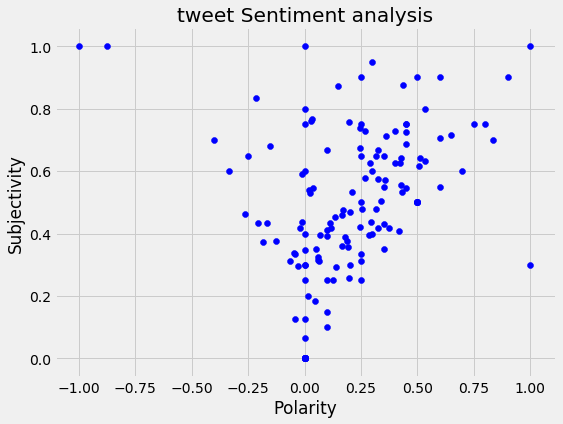

In [31]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['subjectivity'][i], color = 'Blue')
    
plt.title('tweet Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
    

In [32]:
# get the percentage of positive tweets

ptweets = df[df.Analysis =='Positive']
ptweets = ptweets['Tweets']
round( (ptweets.shape[0] / df.shape[0])*100 , 1)

69.3

In [33]:
# get the percentage of negative tweets
ptweets = df[df.Analysis =='Negative']
ptweets = ptweets['Tweets']
round( (ptweets.shape[0] / df.shape[0])*100 , 1)

13.3

In [34]:
# get the percentage of neutral tweets
ptweets = df[df.Analysis =='Neutral']
ptweets = ptweets['Tweets']
round( (ptweets.shape[0] / df.shape[0])*100 , 1)

17.3

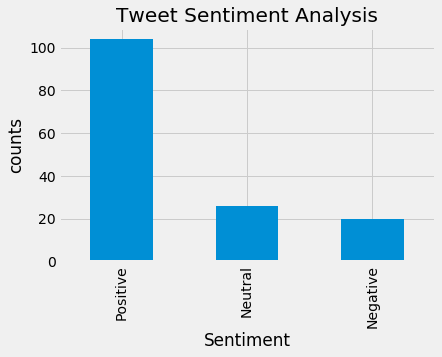

In [35]:
# show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts 
plt.title('Tweet Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()